# Capstone Project 1 (Classification) Dataset= Space titanic.

In [115]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn import tree
from sklearn import metrics
from xgboost.sklearn import XGBClassifier 
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Data Defination

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [116]:
#Load the dataset
df=pd.read_csv("titanic_to_space.csv")

In [117]:
#EDA (Head)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Concluion=The data has been loaded properly and there is no need of modification in terms of col name and values. There are col like Name,Id and Cabin which will not help in prediction hence drop it.

In [118]:
# Deleting unwanted cols
df=df.drop(["PassengerId","Cabin","Name"],axis=1)

In [119]:
#EDA (Tail)
df.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False
8692,Europa,False,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,True


Concluion=The unwanted cols are been deleted.

In [120]:
#EDA (Shape)
df.shape

(8693, 11)

Cocnluion=There are 11 cols and 8693 rows.

In [121]:
#EDA (Cols)
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

Concluion=The target col is Transported.

In [122]:
#EDA (Size)
df.size

95623

Conlusion=There are 95623 data pts.

In [123]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


Concluion=There are missing values and the data matches with dtype hence there is no need of change of dtype.

In [124]:
#EDA (Describe)
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Cocnluion=There is diffrence in median and mean hence there is skewness.

In [125]:
#EDA (Skewness)
df.skew()

CryoSleep        0.591110
Age              0.419097
VIP              6.300900
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
Transported     -0.014497
dtype: float64

Concluion=There is lot of skewness in ShoppingMall.

In [126]:
#EDA (Describe of cat col)
df.describe(include="object")

,HomePlanet,CryoSleep,Destination,VIP
count,8492,8476,8511,8490
unique,3,2,3,2
top,Earth,False,TRAPPIST-1e,False
freq,4602,5439,5915,8291


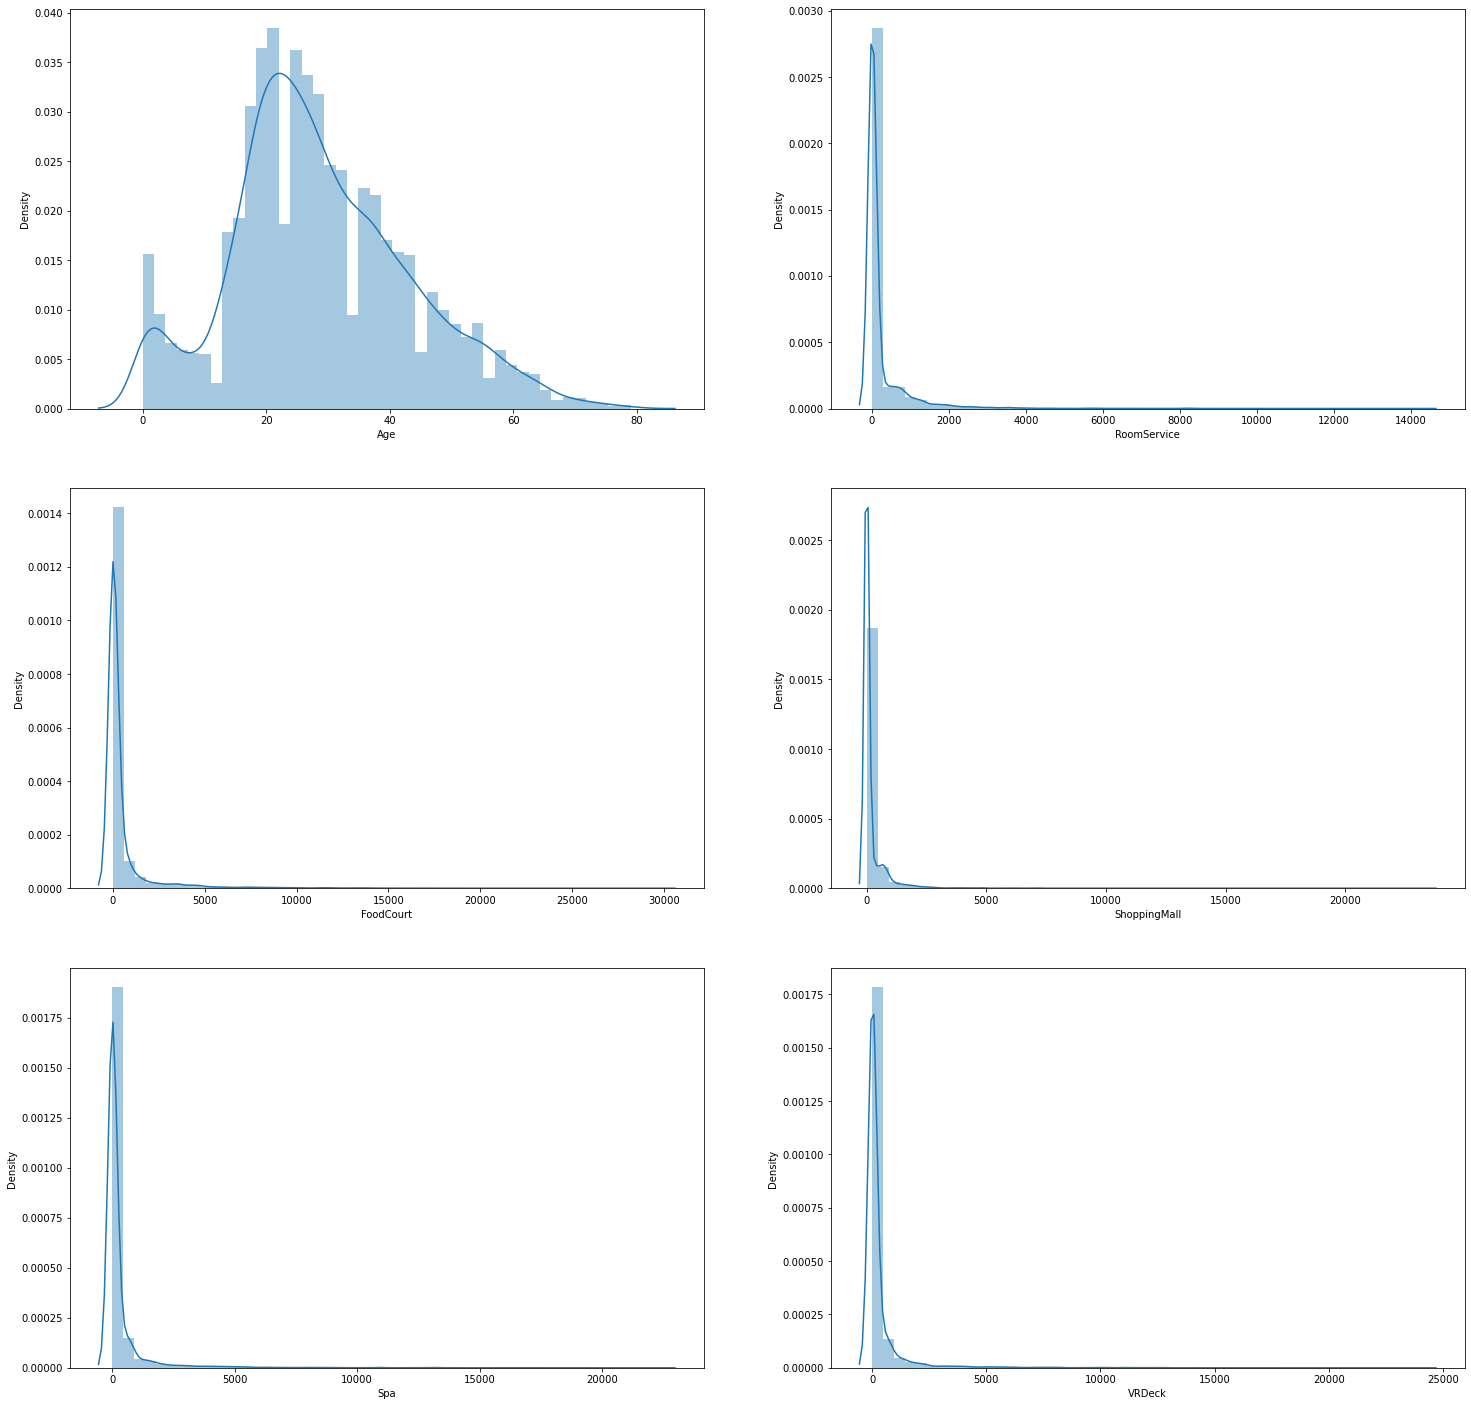

In [127]:
#Data visulization (Numeric data)
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.distplot(df[col],ax=sub)

Concluion=Most of the data is left skewned.

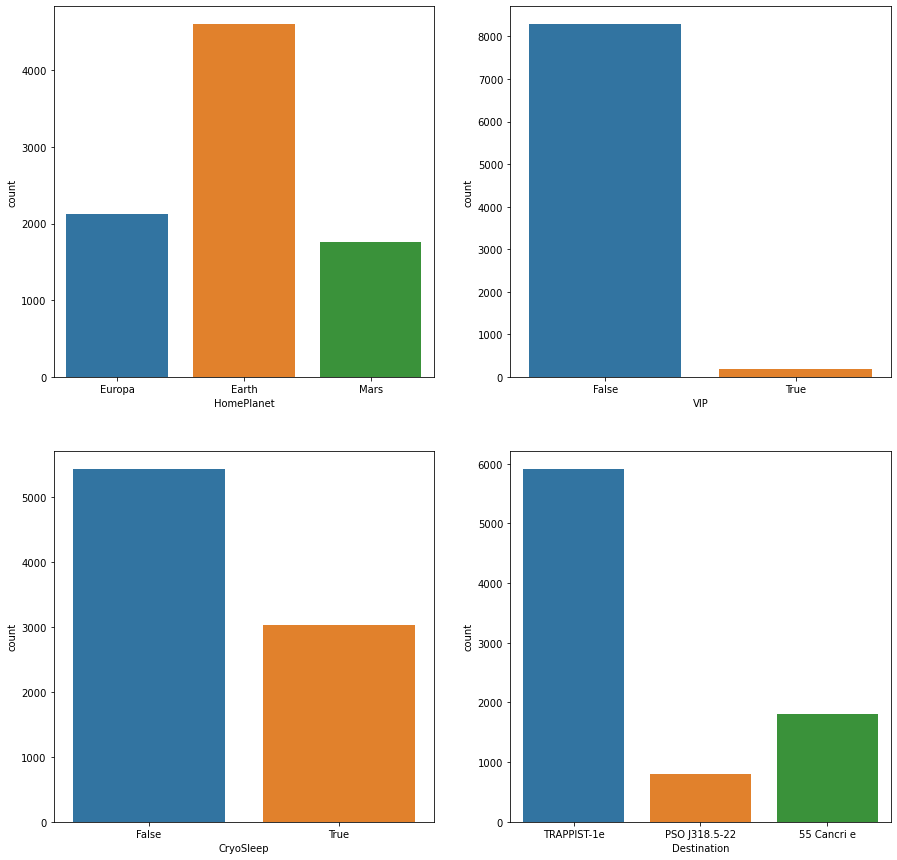

In [128]:
#Data visulization (Cat col)
df_object=df[["HomePlanet","VIP","CryoSleep","Destination"]]
df_object_col=df_object.columns
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,15])
for col,sub in zip(df_object_col,ax.flatten()):
    sns.countplot(df[col],ax=sub)

Concluion=Most of the travellers are from earth and are not vip and not wanting cryosleep and goining to Trappist-1e planet.

In [129]:
#Data visulization (Target col)
px.pie(df,names=df["Transported"])

Conluion=50.4% are been transported and 49.6% are not.

In [130]:
#Missing values
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [131]:
#Taretment of numeric col missing values
for col in df_numeric:
    df[col]=df[col].fillna(df[col].mean())

In [132]:
df["HomePlanet"]=df["HomePlanet"].fillna("Earth")
df["Destination"]=df["Destination"].fillna("TRAPPIST-1e")
df["VIP"]=df["VIP"].fillna("False")
df=df.dropna(subset=["CryoSleep"])

In [133]:
#Missing values
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Concluion=The missing values are been treated.

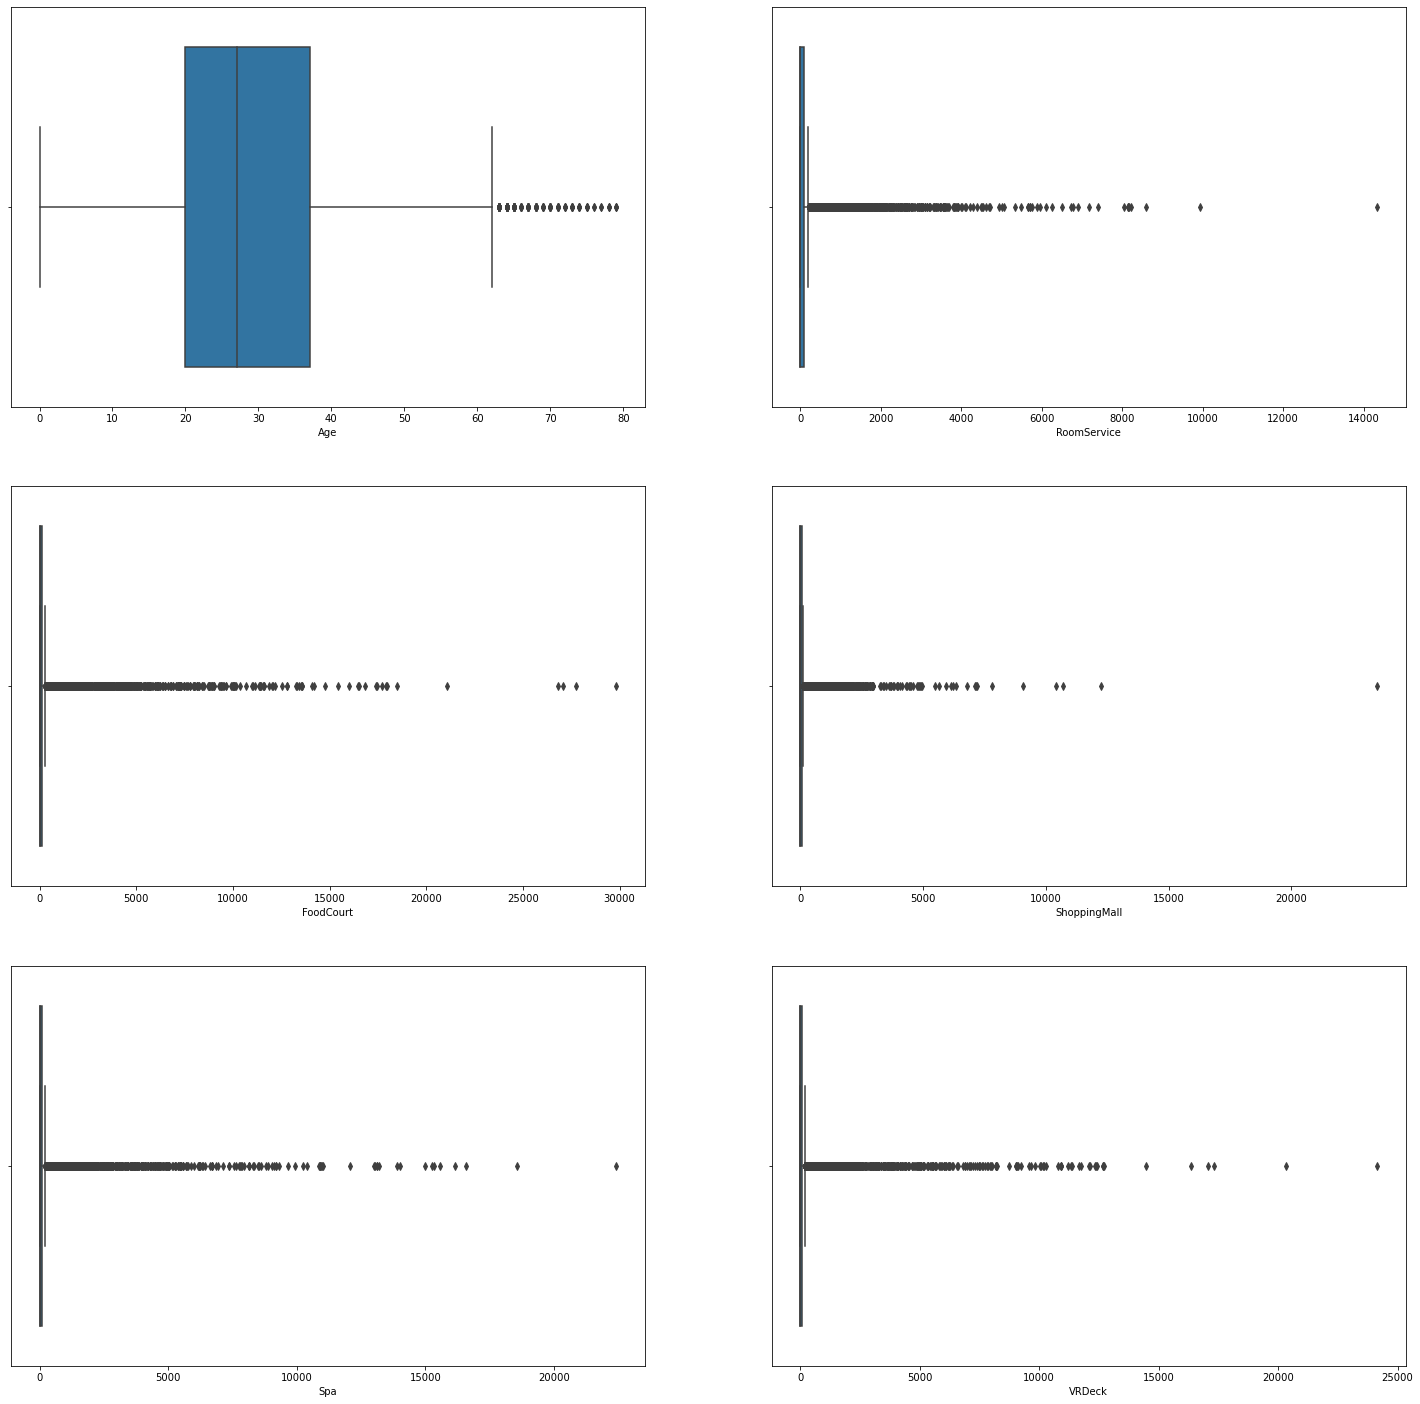

In [134]:
#Outliers detection
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

In [135]:
#Treattment of outliers
df_ot=df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
for col in df_ot:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    mx=q3+(1.5*iqr)
    mn=q1-(1.5*iqr)
    df[col]=np.where(df[col]>mx,mx,df[col])

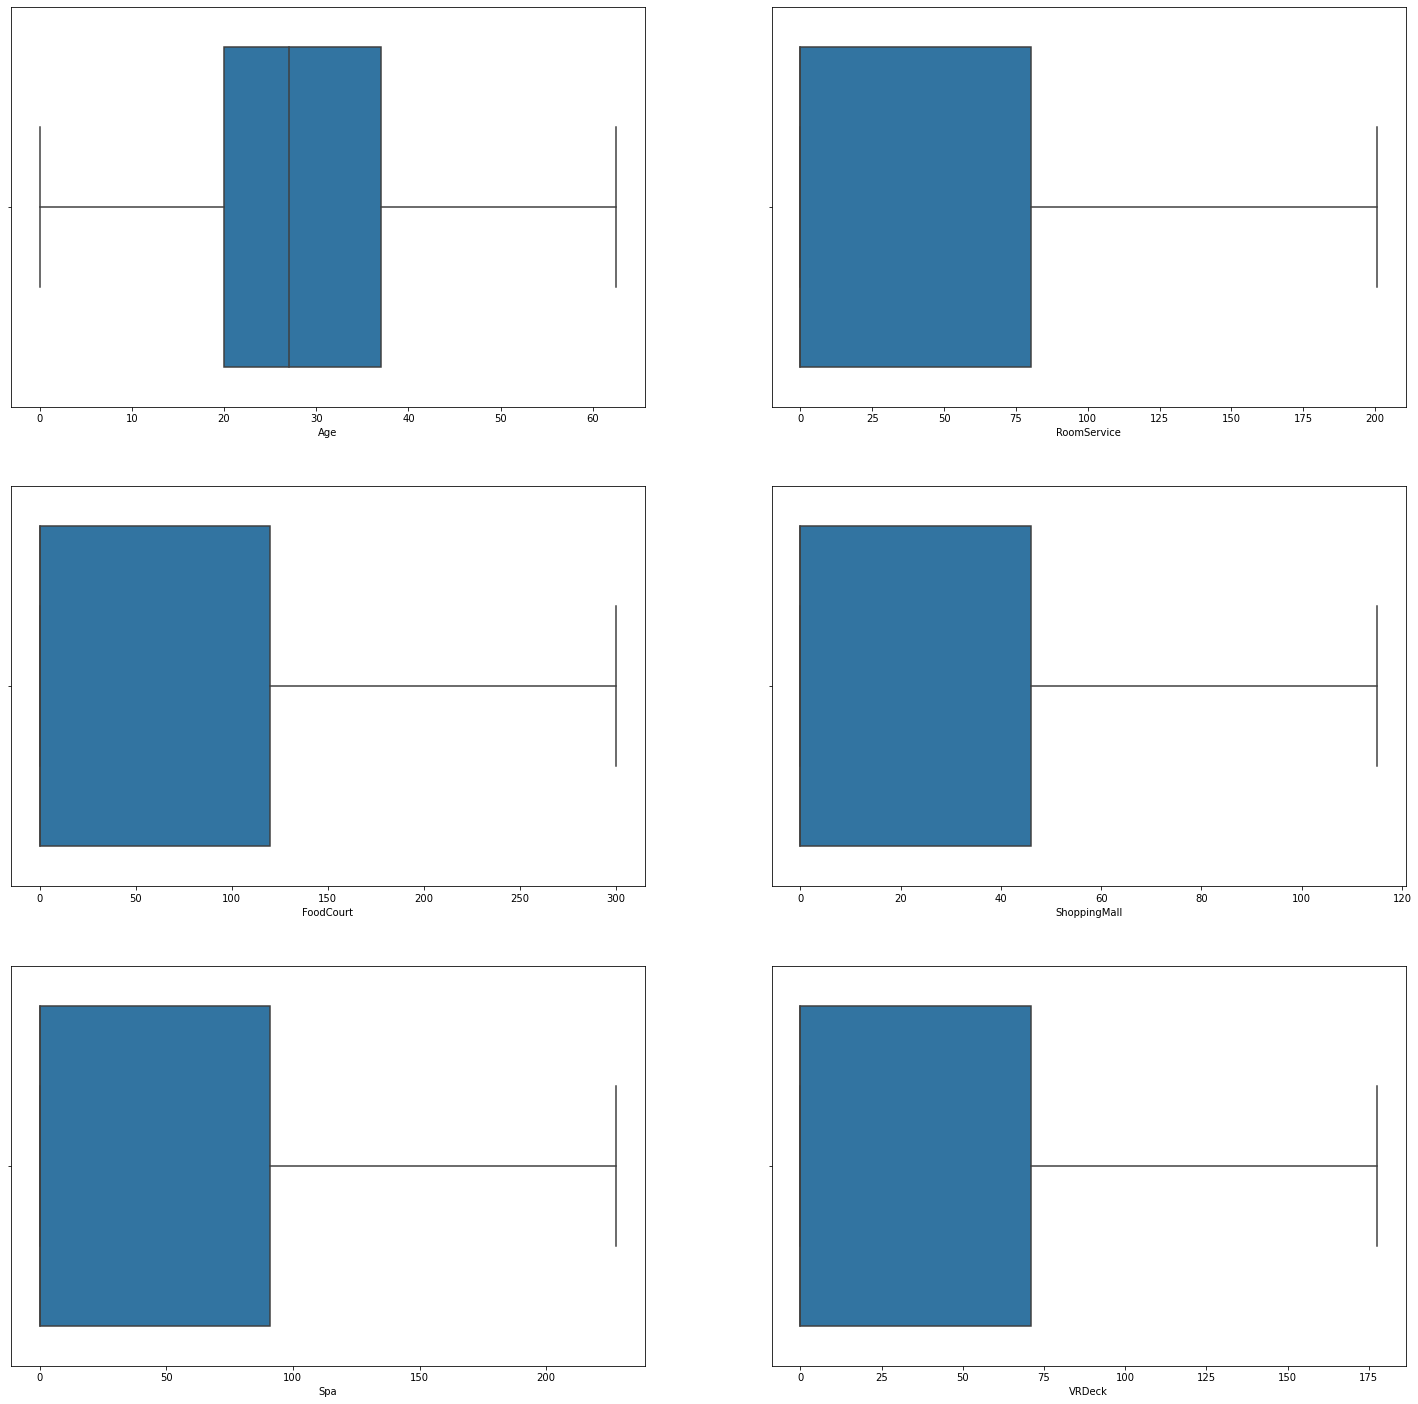

In [136]:
#Outliers detection
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

Concluion=There are no more outliers.

In [137]:
#Treatment of cat col
df["Transported"]=df["Transported"].astype("O")
df=pd.get_dummies(df,drop_first=True)
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,VIP_False,Transported_True
0,39.0,0.000,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0
1,24.0,109.000,9.0,25.0,227.5,44.0,0,0,0,0,1,0,0,1
2,58.0,43.000,300.0,0.0,227.5,49.0,1,0,0,0,1,1,0,0
3,33.0,0.000,300.0,115.0,227.5,177.5,1,0,0,0,1,0,0,0
4,16.0,200.625,70.0,115.0,227.5,2.0,0,0,0,0,1,0,0,1


In [138]:
#Data standardization
ss=StandardScaler()
X=df.drop("Transported_True",axis=1)
y=df["Transported_True"]
ScaledX=ss.fit_transform(X)

In [139]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(ScaledX,y,train_size=0.7)

# Logistic Regression

In [140]:
#Algoritmn
LR=LogisticRegression()
#Fit
LR.fit(X_train,y_train)

LogisticRegression()

In [141]:
#Training and testing score
print("Training score is",LR.score(X_train,y_train))
print("Testing score is",LR.score(X_test,y_test))

Training score is 0.7758301028147648
Testing score is 0.7605190719622493


Concluion=The training and testing score are alright can be better.

In [142]:
#Classification report
predict_LR_x=LR.predict(X_test)
print(classification_report(y_test,predict_LR_x))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1277
           1       0.75      0.78      0.76      1266

    accuracy                           0.76      2543
   macro avg       0.76      0.76      0.76      2543
weighted avg       0.76      0.76      0.76      2543



In [143]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_LR_x))
print("precsion is ",metrics.precision_score(y_test,predict_LR_x))
print("recall is ",metrics.recall_score(y_test,predict_LR_x))

Accuracy is  0.7605190719622493
precsion is  0.749809885931559
recall is  0.7788309636650869


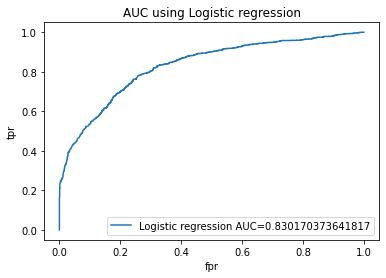

In [206]:
#AUC value
predict_LR =LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predict_LR)
auc = metrics.roc_auc_score(y_test, predict_LR)
plt.plot(fpr,tpr,label="Logistic regression AUC="+str(auc))
plt.legend(loc=4)
plt.title("AUC using Logistic regression")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show();

Concluion=AUC value is 0.85 which is goog enough.

# Naive Bayes

In [145]:
#Algoritm
NB=BernoulliNB()
#Fit
NB.fit(X_train,y_train)

BernoulliNB()

In [146]:
#Training and testing score
print("Training score is",NB.score(X_train,y_train))
print("Testing score is",NB.score(X_test,y_test))

Training score is 0.7470082588909489
Testing score is 0.7369248918600079


Conlcuion=The training and testing score can be better.

In [147]:
#Classification Report
predict_NB_x=NB.predict(X_test)
print(classification_report(y_test,predict_NB_x))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1277
           1       0.77      0.67      0.72      1266

    accuracy                           0.74      2543
   macro avg       0.74      0.74      0.74      2543
weighted avg       0.74      0.74      0.74      2543



In [148]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_NB_x))
print("precsion is ",metrics.precision_score(y_test,predict_NB_x))
print("recall is ",metrics.recall_score(y_test,predict_NB_x))

Accuracy is  0.7369248918600079
precsion is  0.7716105550500455
recall is  0.669826224328594


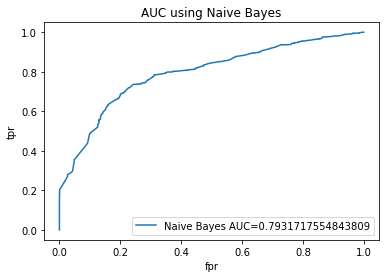

In [207]:
#AUC value
predict_NB=NB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_NB)
auc=roc_auc_score(y_test,predict_NB)
plt.plot(fpr,tpr,label="Naive Bayes AUC="+str(auc))
plt.title("AUC using Naive Bayes")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

Concluion=Auc value is not better than logistics regression

# KNN

In [150]:
#Algoritm
KNN=KNeighborsClassifier()
#Fit
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [151]:
#Training and testing score
print("Training score is",KNN.score(X_train,y_train))
print("Testing score is",KNN.score(X_test,y_test))

Training score is 0.8095398617899882
Testing score is 0.7361384191899332


Conclsuion=The training score is very good.

In [152]:
#Classification Report
predict_KNN_x=KNN.predict(X_test)
print(classification_report(y_test,predict_KNN_x))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1277
           1       0.74      0.72      0.73      1266

    accuracy                           0.74      2543
   macro avg       0.74      0.74      0.74      2543
weighted avg       0.74      0.74      0.74      2543



In [153]:
#Performance parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_KNN_x))
print("precsion is ",metrics.precision_score(y_test,predict_KNN_x))
print("recall is ",metrics.recall_score(y_test,predict_KNN_x))

Accuracy is  0.7361384191899332
precsion is  0.7428571428571429
recall is  0.7187993680884676


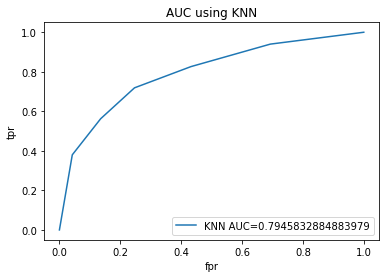

In [208]:
#AUC value
predict_KNN=KNN.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_KNN)
auc=roc_auc_score(y_test,predict_KNN)
plt.plot(fpr,tpr,label="KNN AUC="+str(auc))
plt.title("AUC using KNN")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

Concluion=AUC value is not more than Logistic Regression.

# SVM

In [155]:
#Algoritm
SVM=SVC(probability=True)
#Fit
SVM.fit(X_train,y_train)

SVC(probability=True)

In [156]:
#Training and testing score
print("Training score is",SVM.score(X_train,y_train))
print("Testing score is",SVM.score(X_test,y_test))

Training score is 0.7893140064048542
Testing score is 0.7644514353126229


Concluion=Training and testing score is better than logistic regression.

In [157]:
#Classification Report
predict_SVM_x=SVM.predict(X_test)
print(classification_report(y_test,predict_SVM_x))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1277
           1       0.75      0.78      0.77      1266

    accuracy                           0.76      2543
   macro avg       0.76      0.76      0.76      2543
weighted avg       0.76      0.76      0.76      2543



In [158]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_SVM_x))
print("precsion is ",metrics.precision_score(y_test,predict_SVM_x))
print("recall is ",metrics.recall_score(y_test,predict_SVM_x))

Accuracy is  0.7644514353126229
precsion is  0.7536121673003803
recall is  0.782780410742496


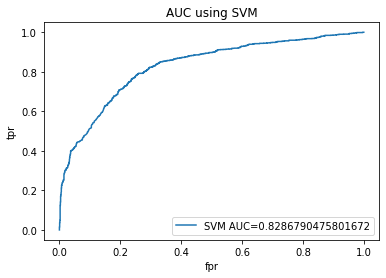

In [209]:
#AUC value
predict_SVM=SVM.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_SVM)
auc=roc_auc_score(y_test,predict_SVM)
plt.plot(fpr,tpr,label="SVM AUC="+str(auc))
plt.title("AUC using SVM")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

Concluion=AUC value is good but not better than logistic regression.

# Decison Tree

In [160]:
#Algoritm
DT=DecisionTreeClassifier()
#Fit
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [161]:
#Traing and testing score
print("Traning score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Traning score is 0.9367942019214562
Testing score is 0.6995674400314589


Conclusion=The taring is good but the testing is not good. Pruning must be done as this is condition of overfit.

In [162]:
#Classification Report
predict_DT=DT.predict(X_test)
print(classification_report(y_test,predict_DT))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69      1277
           1       0.68      0.75      0.71      1266

    accuracy                           0.70      2543
   macro avg       0.70      0.70      0.70      2543
weighted avg       0.70      0.70      0.70      2543



In [163]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_DT))
print("precsion is ",metrics.precision_score(y_test,predict_DT))
print("recall is ",metrics.recall_score(y_test,predict_DT))

Accuracy is  0.6995674400314589
precsion is  0.6810966810966811
recall is  0.7456556082148499


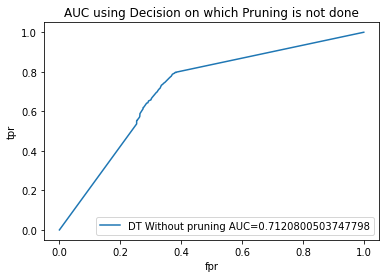

In [210]:
#AUC value
predict_DT=DT.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_DT)
auc=roc_auc_score(y_test,predict_DT)
plt.plot(fpr,tpr,label="DT Without pruning AUC="+str(auc))
plt.title("AUC using Decision on which Pruning is not done")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

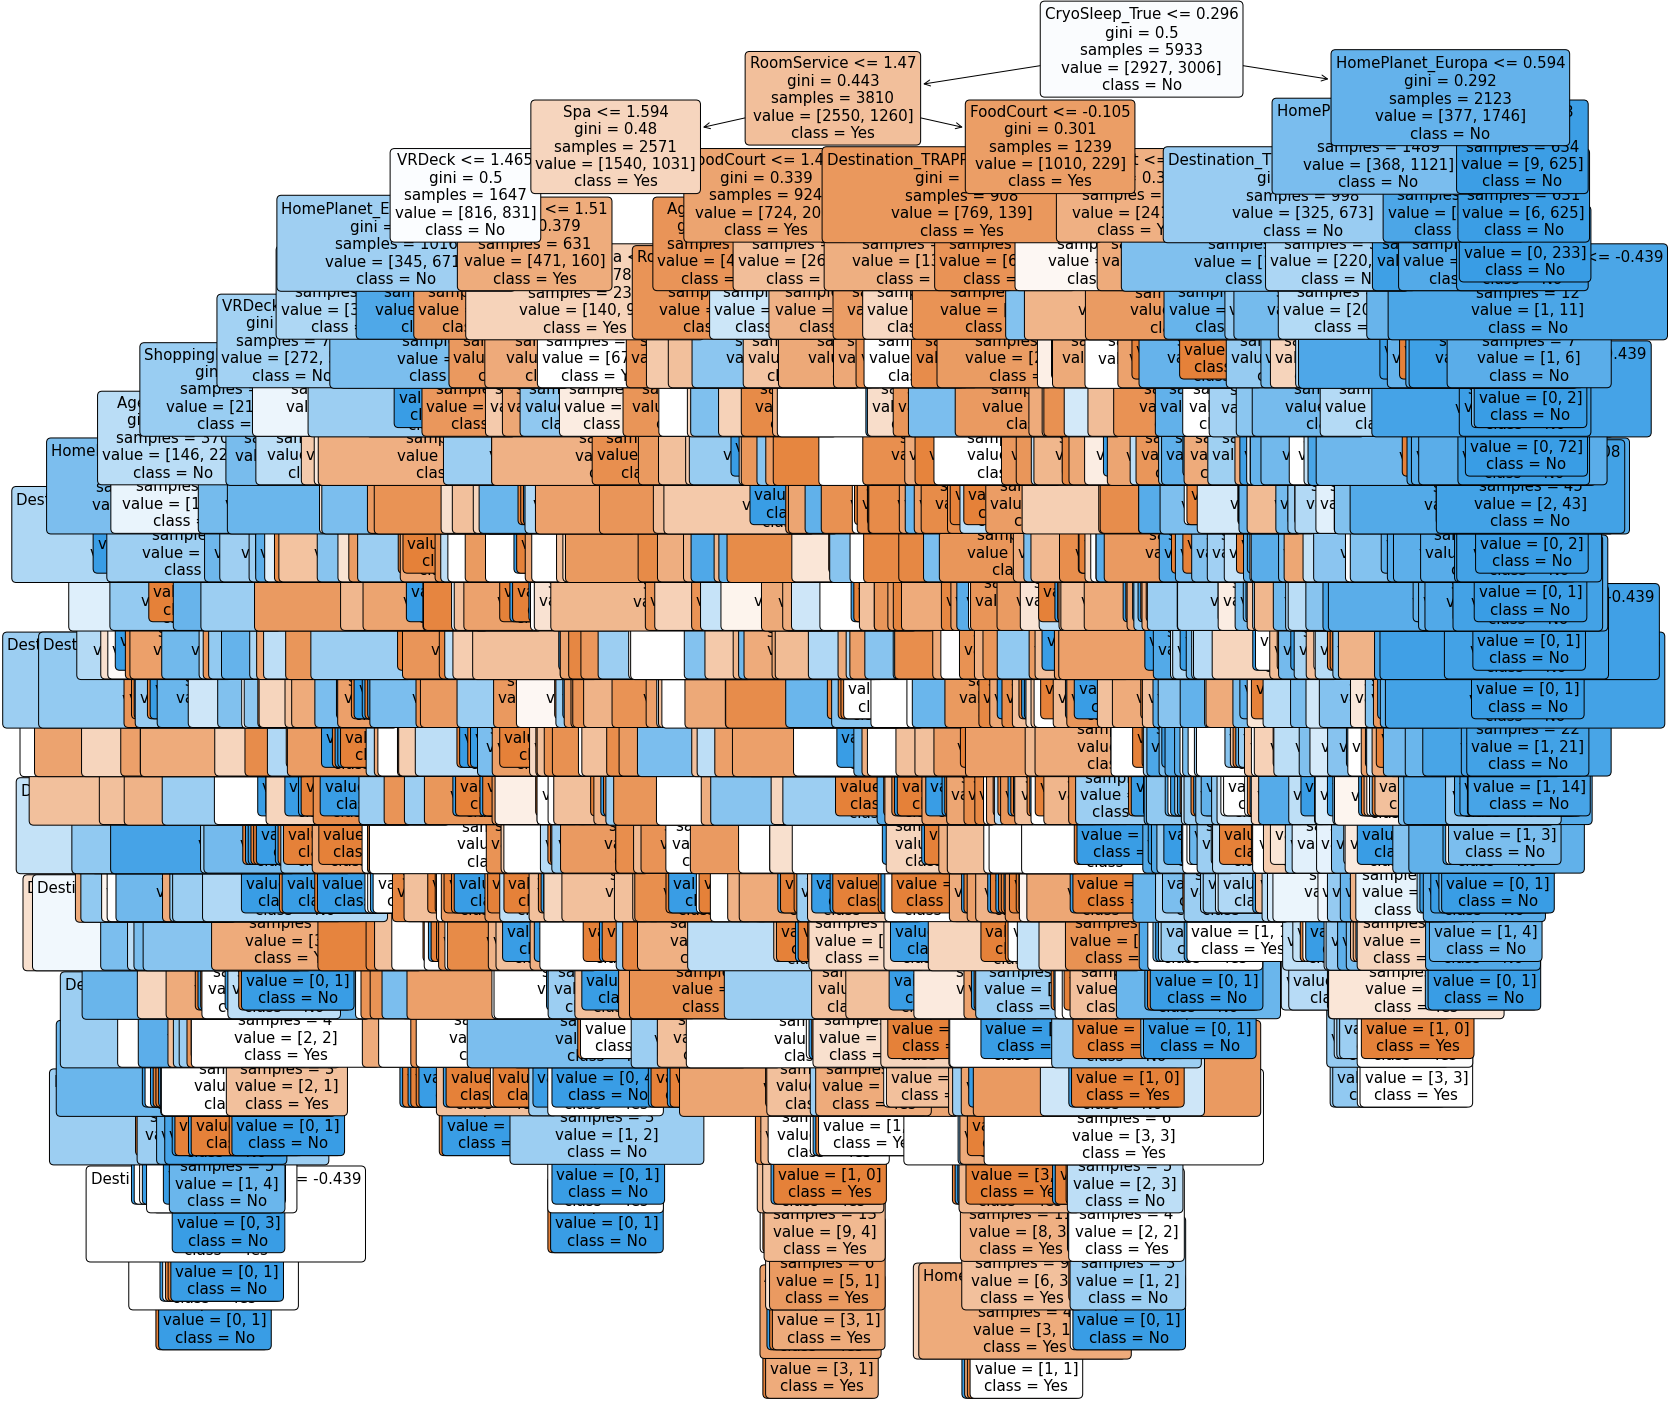

In [165]:
#Tree
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(DT,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

Concluion=We are not able to undersatand anything from the tree so pruning must be done.

In [166]:
#Pruning
#Parameters
hyper_params=dict(criterion=['gini'],max_depth=list(range(1,600)),min_samples_split=list(range(1,600)),min_samples_leaf=list(range(1,600)))
#Gridsearch
Random=RandomizedSearchCV(DT,param_distributions=hyper_params,scoring="accuracy",cv=10)
#Fit
Random.fit(X_train,y_train)
#Best estimators
Random.best_estimator_

DecisionTreeClassifier(max_depth=106, min_samples_leaf=564,
                       min_samples_split=395)

In [167]:
#Algoritm
DT_P=DecisionTreeClassifier(max_depth=274, min_samples_leaf=101,
                       min_samples_split=215)
#Fit
DT_P.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=274, min_samples_leaf=101,
                       min_samples_split=215)

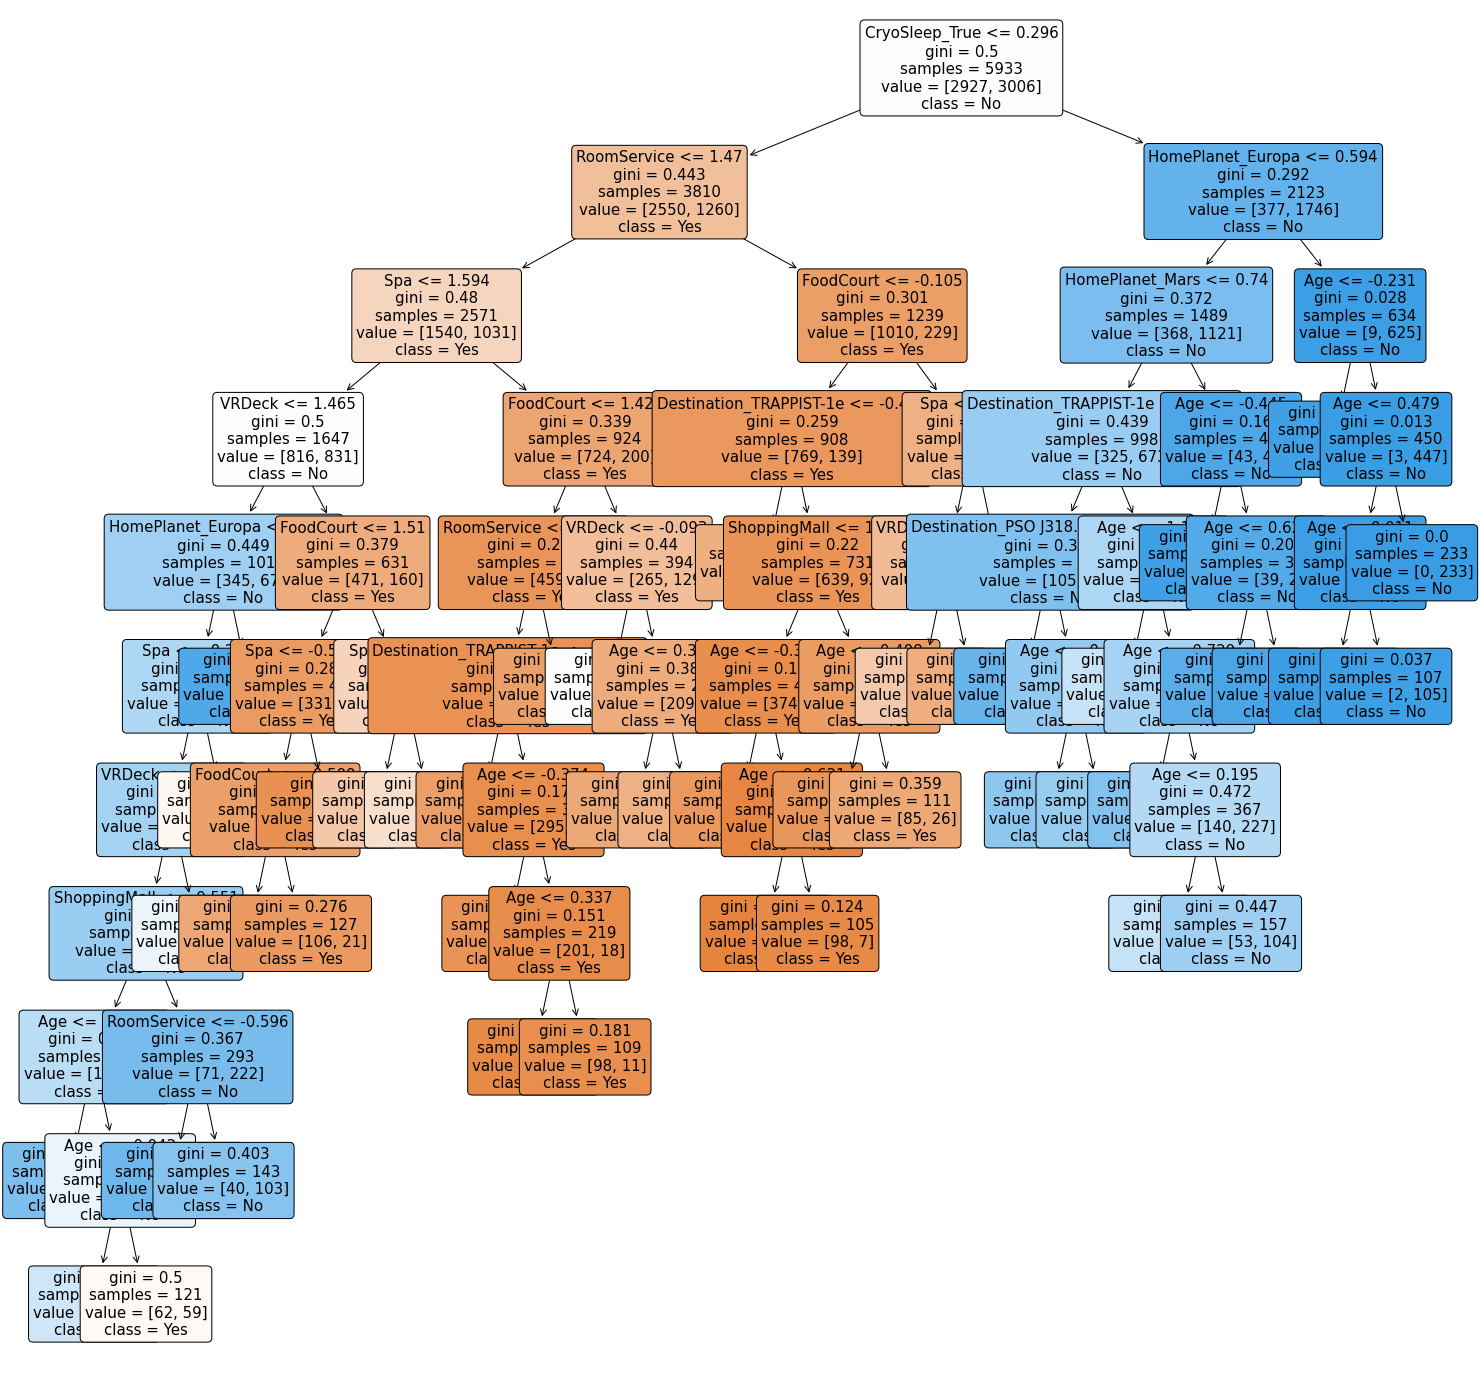

In [168]:
#Tree
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(DT_P,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

Conclusion=After pruning we have better understanding of the DT.

In [169]:
#Traing and testing score
print("Traning score is",DT_P.score(X_train,y_train))
print("Testing score is",DT_P.score(X_test,y_test))

Traning score is 0.78038092027642
Testing score is 0.7573731812819504


Concluion=The training score has reduced but the testing score has increased.

In [170]:
#Classification Report
predict_DT_P=DT_P.predict(X_test)
print(classification_report(y_test,predict_DT_P))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1277
           1       0.75      0.78      0.76      1266

    accuracy                           0.76      2543
   macro avg       0.76      0.76      0.76      2543
weighted avg       0.76      0.76      0.76      2543



In [171]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_DT_P))
print("precsion is ",metrics.precision_score(y_test,predict_DT_P))
print("recall is ",metrics.recall_score(y_test,predict_DT_P))

Accuracy is  0.7573731812819504
precsion is  0.7463933181473045
recall is  0.7764612954186414


Conclusion=The performance parameters have improved.

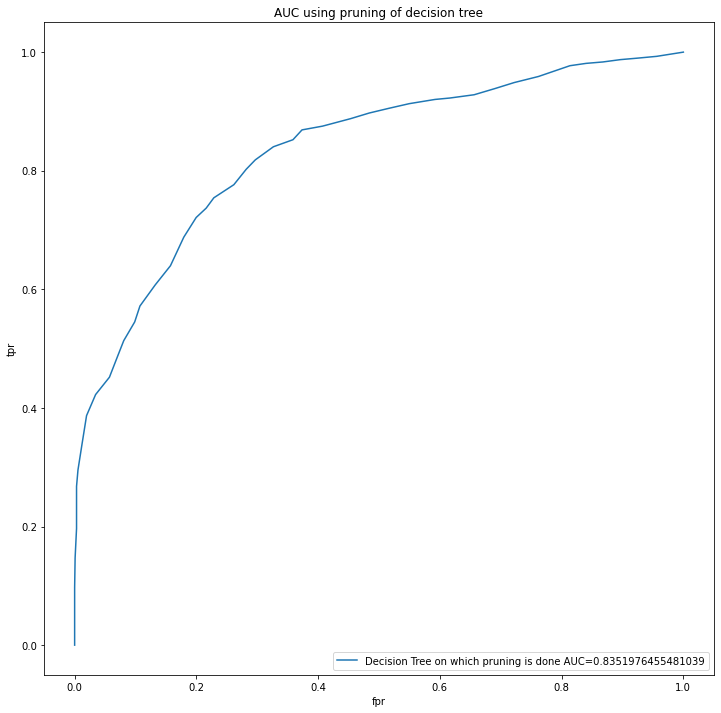

In [215]:
#AUC value
plt.figure(figsize=[12,12])
predict_DT_P=DT_P.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_DT_P)
auc=roc_auc_score(y_test,predict_DT_P)
plt.plot(fpr,tpr,label="Decision Tree on which pruning is done AUC="+str(auc))
plt.title("AUC using pruning of decision tree")
plt.legend(loc=4)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show();

Conclusion=The AUC value is better than logistic regression.

In [173]:
#Important Features
cols=X.columns
feature_imp=DT.feature_importances_
Feature_impt=pd.Series(data=feature_imp,index=cols)
Feature_impt

Age                          0.205104
RoomService                  0.084411
FoodCourt                    0.064861
ShoppingMall                 0.056132
Spa                          0.108487
VRDeck                       0.106992
HomePlanet_Europa            0.033944
HomePlanet_Mars              0.028471
CryoSleep_True               0.265213
Destination_PSO J318.5-22    0.009962
Destination_TRAPPIST-1e      0.023728
VIP_True                     0.006072
VIP_False                    0.006623
dtype: float64

# Ensemble Techniques.

1) Random Forest

2) Exatra Trees

3) Bagging Classification

4) Adabost

5) Gradient Boosting

6) Xgboost

## Random Forest

In [174]:
#Agorithm
RF=RandomForestClassifier(n_estimators=1000)
#Fit
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [175]:
#Traning and testing score
print("Training score is",RF.score(X_train,y_train))
print("Testing score is",RF.score(X_test,y_test))

Training score is 0.9367942019214562
Testing score is 0.73810460086512


Conclusion=The training is good to an extent lacks in testing.

In [176]:
#Classification Report
predict_RF=RF.predict(X_test)
print(classification_report(y_test,predict_RF))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1277
           1       0.74      0.74      0.74      1266

    accuracy                           0.74      2543
   macro avg       0.74      0.74      0.74      2543
weighted avg       0.74      0.74      0.74      2543



In [177]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_RF))
print("precsion is ",metrics.precision_score(y_test,predict_RF))
print("recall is ",metrics.recall_score(y_test,predict_RF))

Accuracy is  0.73810460086512
precsion is  0.7351097178683386
recall is  0.740916271721959


Conclusion=The performance measeures can be better.

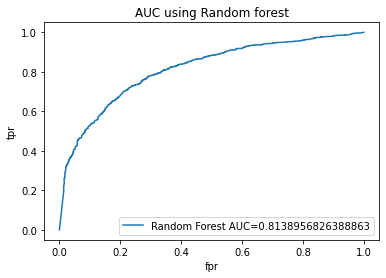

In [216]:
#AUC value
predict_RF=RF.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_RF)
auc=roc_auc_score(y_test,predict_RF)
plt.plot(fpr,tpr,label="Random Forest AUC="+str(auc))
plt.title("AUC using Random forest")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

Conclusion=The auc value is good enough.

## Extra Trees

In [179]:
#Algoritm
ET=ExtraTreesClassifier(n_estimators=10)
#Fit 
ET.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=10)

In [180]:
#Traning and testing score
print("Training score is",ET.score(X_train,y_train))
print("Testing score is",ET.score(X_test,y_test))

Training score is 0.9367942019214562
Testing score is 0.7259142744789618


In [181]:
#Classification Report
predict_ET=ET.predict(X_test)
print(classification_report(y_test,predict_ET))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1277
           1       0.73      0.72      0.72      1266

    accuracy                           0.73      2543
   macro avg       0.73      0.73      0.73      2543
weighted avg       0.73      0.73      0.73      2543



In [182]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_ET))
print("precsion is ",metrics.precision_score(y_test,predict_ET))
print("recall is ",metrics.recall_score(y_test,predict_ET))

Accuracy is  0.7259142744789618
precsion is  0.7281475541299118
recall is  0.717219589257504


Conclusion=The performance parameters are ok.

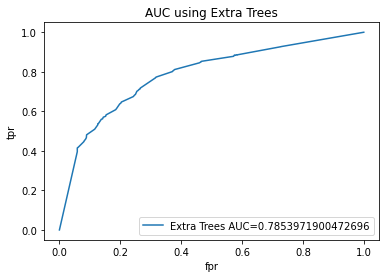

In [217]:
#AUC value
predict_ET=ET.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_ET)
auc=roc_auc_score(y_test,predict_ET)
plt.plot(fpr,tpr,label="Extra Trees AUC="+str(auc))
plt.title("AUC using Extra Trees")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

Conclusion=The AUC value is ok.

## Bagging Classification

In [184]:
#Algorithm
BC=BaggingClassifier()
#Fit
BC.fit(X_train,y_train)

BaggingClassifier()

In [185]:
#Traning and testing score
print("Training score is",BC.score(X_train,y_train))
print("Testing score is",BC.score(X_test,y_test))

Training score is 0.9255014326647565
Testing score is 0.7345654738497838


Conclusion=The training is good to an extent lacks in testing.

In [186]:
#Classification Report
predict_BC=BC.predict(X_test)
print(classification_report(y_test,predict_BC))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1277
           1       0.73      0.74      0.74      1266

    accuracy                           0.73      2543
   macro avg       0.73      0.73      0.73      2543
weighted avg       0.73      0.73      0.73      2543



In [187]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_BC))
print("precsion is ",metrics.precision_score(y_test,predict_BC))
print("recall is ",metrics.recall_score(y_test,predict_BC))

Accuracy is  0.7345654738497838
precsion is  0.7299610894941634
recall is  0.740916271721959


Conclusion=The performance measeures can be better.

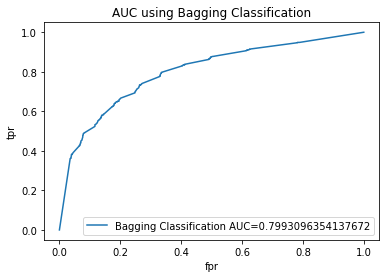

In [218]:
#AUC value
predict_BC=BC.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_BC)
auc=roc_auc_score(y_test,predict_BC)
plt.plot(fpr,tpr,label="Bagging Classification AUC="+str(auc))
plt.title("AUC using Bagging Classification")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

Conclusion=The AUC value is better than other ensemble techniques. 

## Adboost

In [189]:
#Algorithm
AB=AdaBoostClassifier()
#Fit
AB.fit(X_train,y_train)

AdaBoostClassifier()

In [190]:
#Traning and testing score
print("Training score is",AB.score(X_train,y_train))
print("Testing score is",AB.score(X_test,y_test))

Training score is 0.7743131636608799
Testing score is 0.7605190719622493


Conclsuion=The is low bias and low variance.

In [191]:
#Classification Report
predict_AB=AB.predict(X_test)
print(classification_report(y_test,predict_AB))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1277
           1       0.75      0.79      0.77      1266

    accuracy                           0.76      2543
   macro avg       0.76      0.76      0.76      2543
weighted avg       0.76      0.76      0.76      2543



In [192]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_AB))
print("precsion is ",metrics.precision_score(y_test,predict_AB))
print("recall is ",metrics.recall_score(y_test,predict_AB))

Accuracy is  0.7605190719622493
precsion is  0.7453323375653472
recall is  0.7883096366508688


Conclusion=Good Performance parameters.

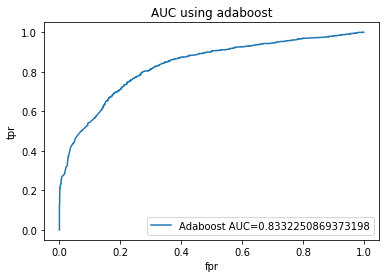

In [220]:
#AUC value
predict_AB=AB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_AB)
auc=roc_auc_score(y_test,predict_AB)
plt.plot(fpr,tpr,label="Adaboost AUC="+str(auc))
plt.title("AUC using adaboost")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

Conclusion=New best AUC.

## Gradient Boost

In [194]:
#Algorithm
GB=GradientBoostingClassifier()
#Fit
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [195]:
#Traning and testing score
print("Training score is",GB.score(X_train,y_train))
print("Testing score is",GB.score(X_test,y_test))

Training score is 0.7975728973537839
Testing score is 0.7703499803381832


Conclsuion=The is low bias and low variance.

In [196]:
#Classification Report
predict_GB=GB.predict(X_test)
print(classification_report(y_test,predict_GB))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1277
           1       0.75      0.80      0.78      1266

    accuracy                           0.77      2543
   macro avg       0.77      0.77      0.77      2543
weighted avg       0.77      0.77      0.77      2543



In [197]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_GB))
print("precsion is ",metrics.precision_score(y_test,predict_GB))
print("recall is ",metrics.recall_score(y_test,predict_GB))

Accuracy is  0.7703499803381832
precsion is  0.7544776119402985
recall is  0.7985781990521327


Conclusion=The performance measures are very good.

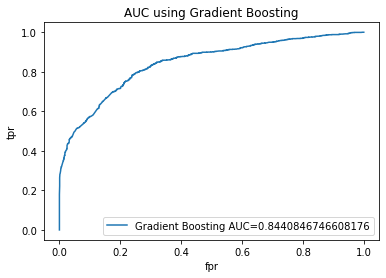

In [221]:
#AUC value
predict_GB=GB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_GB)
auc=roc_auc_score(y_test,predict_GB)
plt.plot(fpr,tpr,label="Gradient Boosting AUC="+str(auc))
plt.title("AUC using Gradient Boosting")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

Conclusion=New best AUC.

## Xgboost

In [199]:
#Algorithm
XG=XGBClassifier()
#Fit
XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [200]:
#Traning and testing score
print("Training score is",XG.score(X_train,y_train))
print("Testing score is",XG.score(X_test,y_test))

Training score is 0.8919602224844092
Testing score is 0.7487219819111286


Conclusion=Low variance and low bias.

In [201]:
#Classification Report
predict_XG=XG.predict(X_test)
print(classification_report(y_test,predict_XG))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1277
           1       0.74      0.77      0.75      1266

    accuracy                           0.75      2543
   macro avg       0.75      0.75      0.75      2543
weighted avg       0.75      0.75      0.75      2543



In [202]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_XG))
print("precsion is ",metrics.precision_score(y_test,predict_XG))
print("recall is ",metrics.recall_score(y_test,predict_XG))

Accuracy is  0.7487219819111286
precsion is  0.7358916478555305
recall is  0.7725118483412322


Conclusion=Acceptable performance.

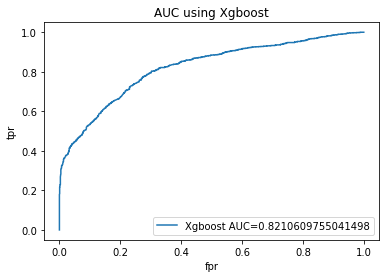

In [222]:
#AUC value
predict_XG=XG.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_XG)
auc=roc_auc_score(y_test,predict_XG)
plt.plot(fpr,tpr,label="Xgboost AUC="+str(auc))
plt.title("AUC using Xgboost")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

Conclusion=The AUC value is not highest.

# Result

In [227]:
result=pd.DataFrame({"Algoritm":["Logistic Regression","Naive Bayes","KNN","SVM","Decision Tree","Decision Tree after Hyerparametric Tunning","Random Forest","Extra Trees","Bagging Classification","Adaboost","Gradient Boost","XgBoost"],"Accuracy":[0.76,0.73,0.73,0.76,0.69,0.75,0.73,0.72,0.73,0.76,0.77,0.74],"Precision":[0.74,0.77,0.74,0.75,0.68,0.74,0.73,0.72,0.72,0.74,0.75,0.73],"Recall":[0.77,0.69,0.718,0.78,0.74,0.77,0.74,0.71,0.74,0.788,0.79,0.77],"AUC":[0.83,0.79,0.79,0.82,0.71,0.83,0.81,0.78,0.79,0.83,0.84,0.82]},index=list(range(1,13)))
result

,Algoritm,Accuracy,Precision,Recall,AUC
1,Logistic Regression,0.76,0.74,0.770,0.83
2,Naive Bayes,0.73,0.77,0.690,0.79
3,KNN,0.73,0.74,0.718,0.79
4,SVM,0.76,0.75,0.780,0.82
5,Decision Tree,0.69,0.68,0.740,0.71
6,Decision Tree after Hyerparametric Tunning,0.75,0.74,0.770,0.83
7,Random Forest,0.73,0.73,0.740,0.81
8,Extra Trees,0.72,0.72,0.710,0.78
9,Bagging Classification,0.73,0.72,0.740,0.79
10,Adaboost,0.76,0.74,0.788,0.83


Conclusion=The performance of all the alogorithm is good enough.

We are choosing Gradient Boosting for future predictions as it has the highest AUC value which is the best deciding factor when it comes to binomial classification.

# Prediction 

In [223]:
#Actual value and the predicted value comparison
prediction= pd.DataFrame({'Actual value': y_test, 'Predicted value':GB.predict(X_test)})
prediction.head(10)

,Actual value,Predicted value
1226,1,0
6664,0,1
5157,1,1
4205,1,1
1422,1,1
5040,1,1
4943,1,1
7825,1,1
6470,1,1
3307,1,1


# Thank You.